In [182]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [183]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

In [184]:
"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names

In [185]:
path = '/content'
ytr,a2,a3,yts,a5,a6,a7 = load_cifar_10_data(path)
print(ytr.shape)
yts.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

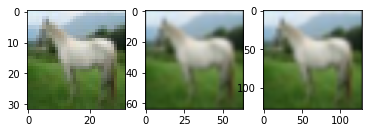

In [186]:
deneme = ytr[152,:,:,:]
deneme1 = skimage.transform.resize(deneme,(64,64),mode='constant')
deneme2 = skimage.transform.resize(deneme,(128,128),mode='constant')
plt.subplot(1,3,1)
plt.imshow(deneme)
plt.subplot(1,3,2)
plt.imshow(deneme1)
plt.subplot(1,3,3)
plt.imshow(deneme2)

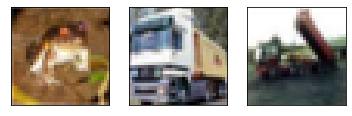

In [192]:
from skimage.color import rgb2gray
xtr = rgb2gray(ytr) # convert color images to gray scale
xts = rgb2gray(yts) # convert color images to gray scale

deneme = ytr[152,:,:,:]
deneme1 = xtr[152,:,:]

idx = 3
for i in range(idx):
  plt.subplot(1,idx,i+1)
  disp_image(ytr[i,:,:,:])

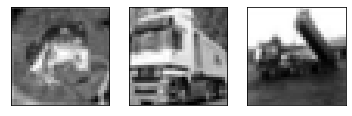

In [193]:
for i in range(idx):
  plt.subplot(2,idx,i+1)
  disp_image(xtr[i,:,:])

In [194]:
a = xts.reshape(10000, 32*32)
c1 = yts[:,:,:,0]
c2 = yts[:,:,:,1]
c3 = yts[:,:,:,2]
c1r = c1.reshape(10000, 32*32)
c2r = c2.reshape(10000, 32*32)
c3r = c3.reshape(10000, 32*32)

In [195]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
# Fit
regalphaone = Lasso(alpha=10)

regalphaone.fit(a, c1r)
c1_hat = regalphaone.predict(a)

regalphaone.fit(a, c2r)
c2_hat = regalphaone.predict(a)

regalphaone.fit(a, c3r)
c3_hat = regalphaone.predict(a)

# Training R^2
#yhat_tr = regalphaone.predict(xtr)
#yhat_ts = regalphaone.predict(xts)


In [196]:
c = np.zeros((10000,1024,3))
c[:,:,0] = c1_hat[:,:]
c[:,:,1] = c2_hat[:,:]
c[:,:,2] = c3_hat[:,:]
cr = c.reshape(10000, 32, 32, 3)

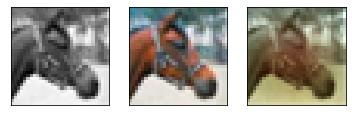

In [197]:
real = yts[17,:,:,:]
pred = cr[17,:,:,:]
bw = xts[17,:,:]

plt.subplot(1,3,1)
disp_image(bw)
plt.subplot(1,3,2)
disp_image(real)
plt.subplot(1,3,3)
disp_image(pred)

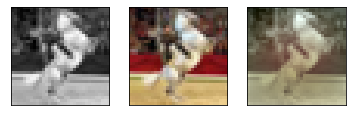

In [198]:
real = yts[119,:,:,:]
pred = cr[119,:,:,:]
bw = xts[119,:,:]

plt.subplot(1,3,1)
disp_image(bw)
plt.subplot(1,3,2)
disp_image(real)
plt.subplot(1,3,3)
disp_image(pred)

In [201]:
e = yts.reshape(10000, 32*32,3)
print(e.shape,c3_hat.shape)
acci1 = r2_score(e[:,:,0], c1_hat)
acci2 = r2_score(e[:,:,1], c2_hat)
acci3 = r2_score(e[:,:,2], c3_hat)

meanacci = (acci1+acci2+acci3)/3
print(acci1,acci2,acci3,meanacci)
zeee = np.mean(e[:,:,2]==c3_hat)
zeee

(10000, 1024, 3) (10000, 1024)
0.4212648977152562 0.5044488804973793 0.390109984813396 0.43860792100867724


0.0

In [426]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [427]:
import tensorflow.keras.backend as K
K.clear_session()

In [428]:
img_inputs = keras.Input(shape=(32, 32, 1))
print(img_inputs.shape,img_inputs.dtype)

cov0 = layers.Conv2D(64, (3,3),activation="relu",padding='same', strides=2)
x = cov0(img_inputs)

cov1 = layers.Conv2D(128, (3,3), activation="relu")
x = cov1(x)

cov2 = layers.Conv2D(128, (3,3), activation="relu")
x = cov2(x)

cov3 = layers.Conv2D(256, (3,3), activation="relu")
x = cov3(x)


cov4 = layers.Conv2D(256, (3,3), activation="relu")
x = cov4(x)

x= layers.UpSampling2D((2, 2))(x)


cov5 = layers.Conv2D(128, (3,3),activation="relu")
x = cov5(x)


cov6 = layers.Conv2D(128, (3,3),activation="relu")
x = cov6(x)

x = layers.UpSampling2D((2, 2))(x)

cov7 = layers.Conv2D(64, (3,3),activation="relu")
x = cov7(x)


cov8 = layers.Conv2D(32, (3,3),activation="relu")
x = cov8(x)

x = layers.UpSampling2D((2, 2))(x)

cov9 = layers.Conv2D(16, (3,3),activation="relu")
x = cov9(x)

cov10 = layers.Conv2D(8, (3,3),activation="relu")
x = cov10(x)

cov11 = layers.Conv2D(4, (3,3),activation="relu")
x = cov11(x)


cov100 = layers.Conv2D(3, (3,3),activation="relu")
outputs = cov100(x)




(None, 32, 32, 1) <dtype: 'float32'>


In [429]:
model = keras.Model(inputs=img_inputs, outputs=outputs, name="deniyom")
model.summary()


Model: "deniyom"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 256)       0   

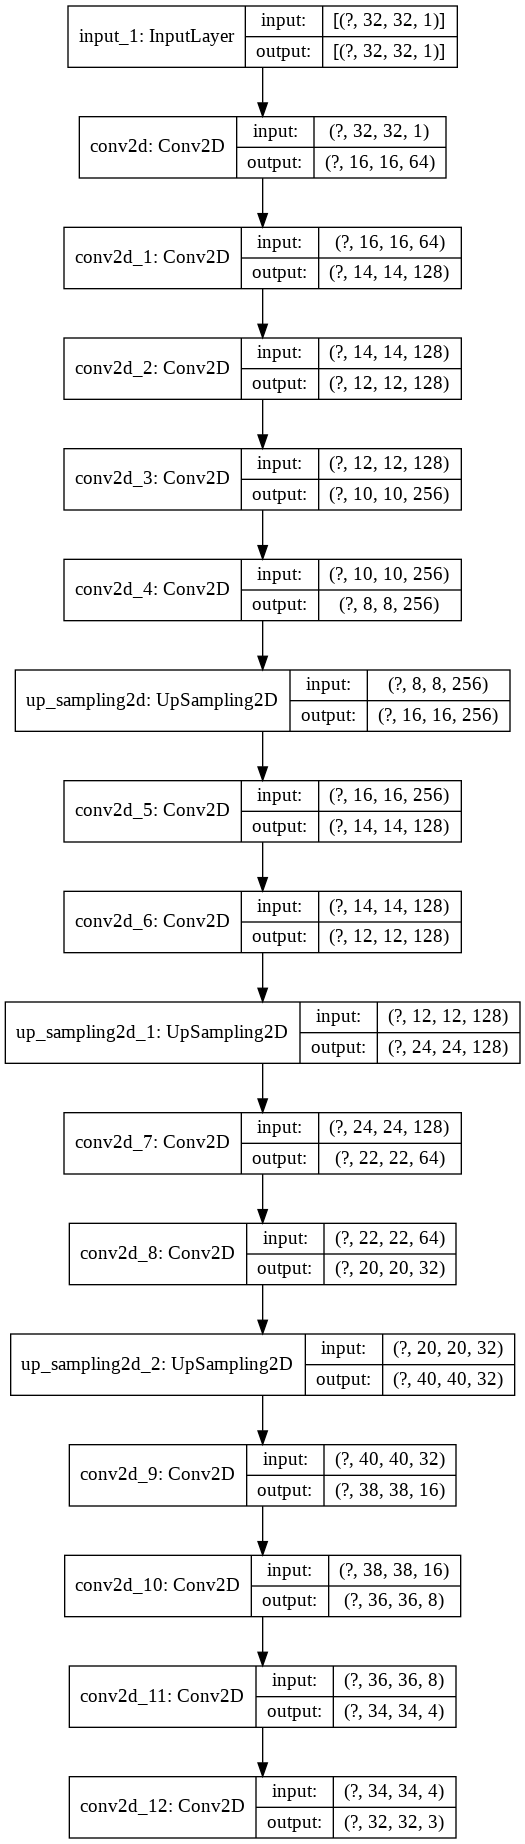

In [430]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [431]:
x_train = xtr #.reshape(50000, 32, 32).astype("float32") / 255
x_test = xts #.reshape(10000, 32, 32).astype("float32") / 255
#ytr = ytr.reshape(50000, 32, 32, 3).astype("float32") / 255
#yts = yts.reshape(10000, 32, 32, 3).astype("float32") / 255
print(x_train.shape, x_test.shape, ytr.shape, yts.shape)

(50000, 32, 32) (10000, 32, 32) (50000, 32, 32, 3) (10000, 32, 32, 3)


In [432]:
model.compile(optimizer='rmsprop',loss='mse',metrics=["accuracy"])

history = model.fit(x_train, ytr, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, yts, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
625/625 [==============================] - 17s 27ms/step - loss: 1.4593e-06 - accuracy: 0.5095 - val_loss: 0.0000e+00 - val_accuracy: 0.5078
Epoch 2/2
625/625 [==============================] - 16s 26ms/step - loss: 0.0000e+00 - accuracy: 0.5098 - val_loss: 0.0000e+00 - val_accuracy: 0.5078
313/313 - 2s - loss: 0.0000e+00 - accuracy: 0.5086
Test loss: 0.0
Test accuracy: 0.5085741281509399
